In [ ]:
from keras.applications import xception
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras

In [ ]:
data_gen = ImageDataGenerator(preprocessing_function=xception.preprocess_input)

train_ds = data_gen.flow_from_directory(
    './Fast Food Classification V2/Train',
    target_size=(100, 100),
    batch_size=32
)

val_ds = data_gen.flow_from_directory(
    './Fast Food Classification V2/Valid',
    target_size=(100, 100),
    batch_size=32
)

## Adjusting the learning rate

In [60]:
def make_model(learning_rate=0.01):
    base_model = xception.Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)
    outputs = keras.layers.Dense(10)(vectors)
    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [61]:
scores = {}

for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(lr)

    model = make_model(learning_rate=lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

0.0001
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/10
96/96 [==============================] - 20s 208ms/step - loss: 1.9262 - accuracy: 0.3403 - val_loss: 1.5806 - val_accuracy: 0.4897
Epoch 2/10
96/96 [==============================] - 16s 166ms/step - loss: 1.3832 - accuracy: 0.5613 - val_loss: 1.2368 - val_accuracy: 0.6012
Epoch 3/10
96/96 [==============================] - 16s 166ms/step - loss: 1.1397 - accuracy: 0.6463 - val_loss: 1.0575 - val_accuracy: 0.6716
Epoch 4/10
96/96 [==============================] - 16s 166ms/step - loss: 1.0022 - accuracy: 0.6858 - val_loss: 0.9497 - val_accuracy: 0.7214
Epoch 5/10
96/96 [==============================] - 16s 166ms/step - loss: 0.9087 - accuracy: 0.7141 - val_loss: 0.8773 - val_accuracy: 0.7566
Epoch 6/10
96/96 [==============================] - 16s 166ms/step - loss: 0.8401 - accuracy: 0.7376 - val_loss: 0.8281 - val_accuracy: 0.7713
Epoch 7/10
96/96 [=========================

In [65]:
del scores[0.1]
del scores[0.0001]

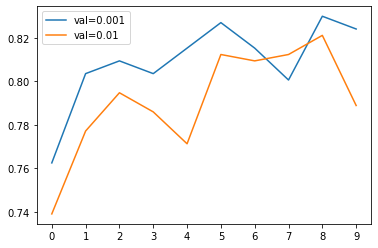

In [68]:
for lr, hist in scores.items():
    #plt.plot(hist['accuracy'], label=('train=%s' % lr))
    plt.plot(hist['val_accuracy'], label=('val=%s' % lr))

plt.xticks(np.arange(10))
plt.legend()

In [ ]:
learning_rate = 0.001

## Checkpointing

In [70]:
model.save_weights('model_v1.h5', save_format='h5')

In [21]:
chechpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only=True,
    monitor='val_accuracy',
    mode='max'
)

In [79]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[chechpoint]
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/10
96/96 [==============================] - 21s 216ms/step - loss: 1.1353 - accuracy: 0.6170 - val_loss: 0.7258 - val_accuracy: 0.7801
Epoch 2/10
96/96 [==============================] - 16s 168ms/step - loss: 0.6469 - accuracy: 0.7735 - val_loss: 0.6332 - val_accuracy: 0.7859
Epoch 3/10
96/96 [==============================] - 16s 169ms/step - loss: 0.5182 - accuracy: 0.8243 - val_loss: 0.5905 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 16s 170ms/step - loss: 0.4390 - accuracy: 0.8553 - val_loss: 0.5550 - val_accuracy: 0.8152
Epoch 5/10
96/96 [==============================] - 16s 170ms/step - loss: 0.3827 - accuracy: 0.8827 - val_loss: 0.5437 - val_accuracy: 0.8211
Epoch 6/10
96/96 [==============================] - 16s 170ms/step - loss: 0.3342 - accuracy: 0.8990 - val_loss: 0.5319 - val_accuracy: 0.8358
Epoch 7/10
96/96 [==============================] 

## Adding more layers

In [3]:
def make_model(learning_rate=0.01, size_inner=100):
    base_model = xception.Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = keras.layers.Dense(10)(inner)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [13]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
    print(size)

    model = make_model(learning_rate=learning_rate, size_inner=size)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[size] = history.history

    print()
    print()

10
83689472/83683744 [==============================] - 1s 0us/step
[2021-11-03 13:35:43.005 ip-172-16-64-149:21634 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-11-03 13:35:43.104 ip-172-16-64-149:21634 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/10
96/96 [==============================] - 42s 438ms/step - loss: 1.1849 - accuracy: 0.6033 - val_loss: 0.8076 - val_accuracy: 0.7243
Epoch 2/10
96/96 [==============================] - 16s 169ms/step - loss: 0.7314 - accuracy: 0.7474 - val_loss: 0.7305 - val_accuracy: 0.7507
Epoch 3/10
96/96 [==============================] - 16s 169ms/step - loss: 0.5834 - accuracy: 0.8018 - val_loss: 0.6308 - val_accuracy: 0.7889
Epoch 4/10
96/96 [==============================] - 16s 170ms/step - loss: 0.4878 - accuracy: 0.8370 - val_loss: 0.6715 - val_accuracy: 

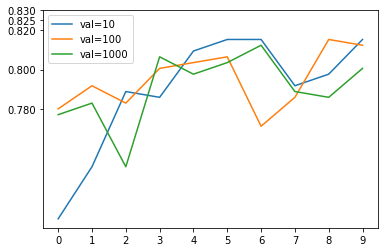

In [16]:
for size, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % size))

plt.xticks(np.arange(10))
plt.yticks([0.78, 0.80, 0.82, 0.825, 0.83])
plt.legend()

## Regularization and dropout

In [8]:
def make_model(learning_rate=0.01, size_inner=100, droprate=0.5):
    base_model = xception.Xception(
        weights='imagenet',
        include_top=False,
        input_shape=(150, 150, 3)
    )

    base_model.trainable = False

    inputs = keras.Input(shape=(150, 150, 3))
    base = base_model(inputs, training=False)
    vectors = keras.layers.GlobalAveragePooling2D()(base)

    inner = keras.layers.Dense(size_inner, activation='relu')(vectors)
    drop = keras.layers.Dropout(droprate)(inner)

    outputs = keras.layers.Dense(10)(drop)

    model = keras.Model(inputs, outputs)

    optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=['accuracy']
    )

    return model

In [13]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(droprate)

    model = make_model(
        learning_rate=learning_rate,
        size_inner=size,
        droprate=droprate
    )

    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

0.0
[2021-11-03 21:19:20.707 ip-172-16-13-140:18999 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2021-11-03 21:19:20.814 ip-172-16-13-140:18999 INFO profiler_config_parser.py:111] Unable to find config at /opt/ml/input/config/profilerconfig.json. Profiler is disabled.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/30
96/96 [==============================] - 56s 583ms/step - loss: 0.9642 - accuracy: 0.6747 - val_loss: 0.6832 - val_accuracy: 0.7566
Epoch 2/30
96/96 [==============================] - 15s 158ms/step - loss: 0.5163 - accuracy: 0.8230 - val_loss: 0.6058 - val_accuracy: 0.7918
Epoch 3/30
96/96 [==============================] - 15s 160ms/step - loss: 0.3458 - accuracy: 0.8885 - val_loss: 0.5577 - val_accuracy: 0.8270
Epoch 4/30
96/96 [==============================] - 15s 161ms/step - loss: 0.2575 - accuracy: 0.9218 - val_loss: 0.5166 - val_accuracy: 0.8416
Epoch 5/30
96/96 [==============================] - 15s 1

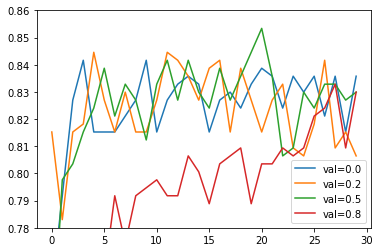

In [16]:
for droprate, hist in scores.items():
    plt.plot(hist['val_accuracy'], label=('val=%s' % droprate))

plt.ylim(0.78, 0.86)
plt.legend()

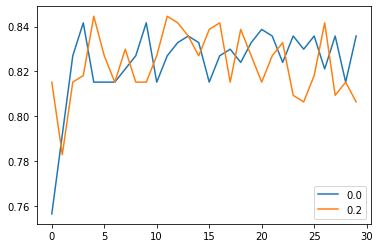

In [23]:
hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

plt.legend()
#plt.plot(hist['accuracy'], label=('val=%s' % droprate))

## Data augmentation

In [17]:
train_gen = ImageDataGenerator(
    preprocessing_function=xception.preprocess_input,
)

train_ds = train_gen.flow_from_directory(
    './clothing-dataset-small/train',
    target_size=(150, 150),
    batch_size=32
)

val_gen = ImageDataGenerator(preprocessing_function=xception.preprocess_input)

val_ds = val_gen.flow_from_directory(
    './clothing-dataset-small/validation',
    target_size=(150, 150),
    batch_size=32,
    shuffle=False
)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [18]:
learning_rate = 0.001
size = 100
droprate = 0.2

model = make_model(
    learning_rate=learning_rate,
    size_inner=size,
    droprate=droprate
)

history = model.fit(train_ds, epochs=50, validation_data=val_ds)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 96 steps, validate for 11 steps
Epoch 1/50
96/96 [==============================] - 19s 200ms/step - loss: 1.0738 - accuracy: 0.6346 - val_loss: 0.6670 - val_accuracy: 0.7859
Epoch 2/50
96/96 [==============================] - 16s 162ms/step - loss: 0.6210 - accuracy: 0.7846 - val_loss: 0.5732 - val_accuracy: 0.8182
Epoch 3/50
96/96 [==============================] - 16s 162ms/step - loss: 0.4573 - accuracy: 0.8387 - val_loss: 0.5620 - val_accuracy: 0.8182
Epoch 4/50
96/96 [==============================] - 15s 161ms/step - loss: 0.3637 - accuracy: 0.8797 - val_loss: 0.5376 - val_accuracy: 0.8094
Epoch 5/50
96/96 [==============================] - 16s 162ms/step - loss: 0.2951 - accuracy: 0.9042 - val_loss: 0.5465 - val_accuracy: 0.8065
Epoch 6/50
96/96 [==============================] - 16s 162ms/step - loss: 0.2348 - accuracy: 0.9283 - val_loss: 0.6016 - val_accuracy: 0.7918
Epoch 7/50
96/96 [==============================] 

KeyboardInterrupt: 

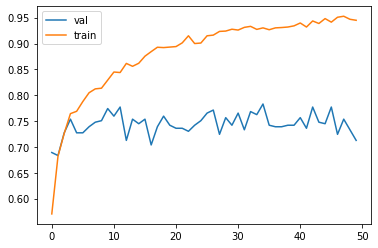

In [12]:
hist = history.history
plt.plot(hist['val_accuracy'], label='val')
plt.plot(hist['accuracy'], label='train')

plt.legend()